In [1]:
import random
import numpy as np
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import math
import scipy.stats as stats
from datetime import datetime, timedelta
import statsmodels.api as sm
%matplotlib inline

In [2]:
tickers=['^GSPC','TSLA','AAPL','MSFT','WMT','CAT']

In [3]:
df=yf.download(tickers,start='2010-09-15',end='2020-09-15')['Close']

[*********************100%***********************]  6 of 6 completed


In [4]:
df

,AAPL,CAT,MSFT,TSLA,WMT,^GSPC
Date,,,,,,
2010-09-14,9.573571,71.830002,25.030001,1.408000,52.660000,1121.099976
2010-09-15,9.650714,72.129997,25.120001,1.465333,52.860001,1125.069946
2010-09-16,9.877500,72.000000,25.330000,1.396000,53.150002,1124.660034
2010-09-17,9.834643,73.180000,25.219999,1.348667,53.009998,1125.589966
2010-09-20,10.115357,74.750000,25.430000,1.404000,53.540001,1142.709961
...,...,...,...,...,...,...
2020-09-08,112.820000,148.520004,202.660004,110.070000,138.449997,3331.840088
2020-09-09,117.320000,152.690002,211.289993,122.093330,139.889999,3398.959961
2020-09-10,113.489998,149.860001,205.369995,123.779999,136.809998,3339.189941


In [5]:
df1=df[tickers[1:]].pct_change()
df1

,TSLA,AAPL,MSFT,WMT,CAT
Date,,,,,
2010-09-14,NaN,NaN,NaN,NaN,NaN
2010-09-15,0.040719,0.008058,0.003596,0.003798,0.004176
2010-09-16,-0.047315,0.023499,0.008360,0.005486,-0.001802
2010-09-17,-0.033906,-0.004339,-0.004343,-0.002634,0.016389
2010-09-20,0.041028,0.028543,0.008327,0.009998,0.021454
...,...,...,...,...,...
2020-09-08,-0.210628,-0.067295,-0.054096,-0.030666,0.002295
2020-09-09,0.109233,0.039887,0.042584,0.010401,0.028077
2020-09-10,0.013815,-0.032646,-0.028018,-0.022017,-0.018534


In [6]:
mat=pd.DataFrame(columns=[tickers[1:]],index=[['Return','Risk','Beta','E(Return)']])
mat

,TSLA,AAPL,MSFT,WMT,CAT
Return,NaN,NaN,NaN,NaN,NaN
Risk,NaN,NaN,NaN,NaN,NaN
Beta,NaN,NaN,NaN,NaN,NaN
E(Return),NaN,NaN,NaN,NaN,NaN


In [7]:
mat.loc['Return','TSLA']=np.prod(1+df1.TSLA)**(1/10)-1
mat.loc['Return','AAPL']=np.prod(1+df1.AAPL)**(1/10)-1
mat.loc['Return','MSFT']=np.prod(1+df1.MSFT)**(1/10)-1
mat.loc['Return','WMT']=np.prod(1+df1.WMT)**(1/10)-1
mat.loc['Return','CAT']=np.prod(1+df1.CAT)**(1/10)-1
mat.loc['Risk','TSLA']=df1.TSLA.std()*np.sqrt(252)
mat.loc['Risk','AAPL']=df1.AAPL.std()*np.sqrt(252)
mat.loc['Risk','MSFT']=df1.MSFT.std()*np.sqrt(252)
mat.loc['Risk','WMT']=df1.WMT.std()*np.sqrt(252)
mat.loc['Risk','CAT']=df1.CAT.std()*np.sqrt(252)
mat

,TSLA,AAPL,MSFT,WMT,CAT
Return,0.583847,0.28262,0.234287,0.100589,0.078905
Risk,0.557152,0.28027,0.25514,0.193499,0.286347
Beta,NaN,NaN,NaN,NaN,NaN
E(Return),NaN,NaN,NaN,NaN,NaN


In [8]:
df1.cov()*252

,TSLA,AAPL,MSFT,WMT,CAT
TSLA,0.310418,0.048273,0.046387,0.015287,0.040881
AAPL,0.048273,0.078551,0.039048,0.016044,0.036276
MSFT,0.046387,0.039048,0.065096,0.018420,0.036651
WMT,0.015287,0.016044,0.018420,0.037442,0.015869
CAT,0.040881,0.036276,0.036651,0.015869,0.081995


In [9]:
portfolio=pd.DataFrame(columns=[tickers[1:]],index=['Weights'])
portfolio.loc['Weights',tickers[1:]]=[1/5 for i in range(5)]
portfolio['Total']=1
portfolio

,TSLA,AAPL,MSFT,WMT,CAT,Total
Weights,0.2,0.2,0.2,0.2,0.2,1


In [10]:
sum(portfolio.loc['Weights',tickers[1:]].values*mat.loc['Return',tickers[1:]].values)

array([0.11676940143784381, 0.05652407097814116, 0.04685735340530082,
       0.020117865161577122, 0.015780936452093774], dtype=object)

In [11]:
0.2*0.583847

0.11676940000000001

In [12]:
0.11676940143784381+0.05652407097814116+0.04685735340530082+0.020117865161577122+0.015780936452093774

0.2560496274349567

In [13]:
returns=(portfolio.loc['Weights',tickers[1:]].values*mat.loc['Return',tickers[1:]].values.mean()).sum()
risk=(portfolio.loc['Weights',tickers[1:]].values.T.dot((df1.cov()*252).dot(portfolio.loc['Weights',tickers[1:]].values)))**(1/2)
returns,risk

(0.2560496274349567, 0.21906832432342613)

In [14]:
Theta=3#1 to 5 1 means the investor hate risk less, 5 means the investor hate risk a lot
utility=returns-Theta/2*risk**2
utility

0.18406323135214597

In [15]:
portfolio.loc['Weights',tickers[1:]].values.dot(mat.loc['Return',tickers[1:]].values.mean()).sum()

0.2560496274349567

In [16]:
p_wt  =[]
util=[]
for x in range(30000):
    p_weights=np.random.random(len(tickers[1:]))
    p_weights/=np.sum(p_weights)
    returns=p_weights.dot(mat.loc['Return',tickers[1:]].values.mean()).sum()
    risk=(p_weights.T.dot((df1.cov()*252).dot(p_weights)))**(1/2)
    utility=returns-Theta/2*risk**2
    p_wt.append(p_weights)
    util.append(utility)

p_wt = np.array(p_wt)
util= np.array(util)

    
util,p_wt

(array([0.15605627, 0.18596448, 0.18129689, ..., 0.16308146, 0.15088754,
        0.19125749]),
 array([[0.3043404 , 0.26134732, 0.16595215, 0.10085136, 0.16750878],
        [0.02837461, 0.39856406, 0.35796039, 0.06942306, 0.14567788],
        [0.01074999, 0.18644014, 0.36236466, 0.01612707, 0.42431813],
        ...,
        [0.27693194, 0.25995728, 0.10313269, 0.1189875 , 0.24099059],
        [0.28828517, 0.3946773 , 0.2299647 , 0.04798724, 0.03908559],
        [0.16282843, 0.16892594, 0.08861393, 0.26609503, 0.31353667]]))

In [17]:
SR_IDX=np.argmax(util)
SR_IDX

22381

In [18]:
p_wt[SR_IDX]

array([0.02155761, 0.11182087, 0.1604935 , 0.60590734, 0.10022068])

In [19]:
util[SR_IDX]

0.21168010778992724

In [20]:
p_wt[SR_IDX][0],p_wt[SR_IDX][1],p_wt[SR_IDX][2],p_wt[SR_IDX][3],p_wt[SR_IDX][4]

(0.02155760956675414,
 0.11182086612495909,
 0.16049349717567657,
 0.605907344676588,
 0.10022068245602218)

In [21]:
SP500_returns=np.prod(1+df['^GSPC'].pct_change())**(1/10)-1
Risk_free_rate=0.67

In [22]:
x=sm.add_constant(df['^GSPC'].pct_change().dropna())
for i in tickers[1:]:
    model=sm.OLS(df1[i].dropna(),x)
    results=model.fit()
    mat.loc['Beta',i]=results.params[1]

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CAT   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2856.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:21:17   Log-Likelihood:                 7490.3
No. Observations:                2517   AIC:                        -1.498e+04
Df Residuals:                    2515   BIC:                        -1.496e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.552      0.581      -0.001       0.000
^GSPC          1.2048      0.023     53.440      0.000       1.161       1.249
==============================================================================
Omnibus:                      293.748   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2870.051
Skew:                           0.028   Prob(JB):                         0.00
Kurtosis:                       8.231   Cond. No.                         91.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
for i in tickers[1:]:
    e=Risk_free_rate+((mat.loc['Beta',i].values*SP500_returns)-Risk_free_rate)
    print(e)
    mat.loc['E(Return)',i]=e

[[0.14912838292281572]]
[[0.12370411984596974]]
[[0.12893116011827288]]
[[0.06219112726515996]]
[[0.14071544357834376]]


In [25]:
mat

,TSLA,AAPL,MSFT,WMT,CAT
Return,0.583847,0.28262,0.234287,0.100589,0.078905
Risk,0.557152,0.28027,0.25514,0.193499,0.286347
Beta,1.27686,1.059174,1.103928,0.53249,1.204827
E(Return),0.149128,0.123704,0.128931,0.062191,0.140715


In [26]:
p_wt  =[]
util=[]
for x in range(30000):
    p_weights=np.random.random(len(tickers[1:]))
    p_weights/=np.sum(p_weights)
    returns=p_weights.dot(mat.loc['E(Return)',tickers[1:]].values.mean()).sum()
    risk=(p_weights.T.dot((df1.cov()*252).dot(p_weights)))**(1/2)
    utility=returns-Theta/2*risk**2
    p_wt.append(p_weights)
    util.append(utility)

p_wt = np.array(p_wt)
util= np.array(util)

    
util,p_wt

(array([0.02296808, 0.02430366, 0.05723698, ..., 0.02742876, 0.06148332,
        0.06730193]),
 array([[0.29497545, 0.07563556, 0.37926105, 0.1030407 , 0.14708724],
        [0.30699741, 0.30122908, 0.00420955, 0.18659039, 0.20097357],
        [0.1238175 , 0.30404895, 0.11946703, 0.21280731, 0.23985921],
        ...,
        [0.24741211, 0.25841944, 0.37580297, 0.05241918, 0.0659463 ],
        [0.07611408, 0.18508779, 0.43899495, 0.2431028 , 0.05670038],
        [0.11224122, 0.25750083, 0.16823445, 0.39111031, 0.07091318]]))

In [27]:
SR_IDX=np.argmax(util)
SR_IDX

26516

In [28]:
p_wt[SR_IDX]

array([0.03032658, 0.09754334, 0.10790196, 0.6127326 , 0.15149551])

In [29]:
util[SR_IDX]

0.07645205535477134

In [30]:
returns=(p_wt[SR_IDX]*mat.loc['E(Return)',tickers[1:]].values.mean()).sum()
risk=(p_wt[SR_IDX].T.dot((df1.cov()*252).dot(p_wt[SR_IDX])))**(1/2)
returns,risk

(0.12093404674611241, 0.17220528716494365)

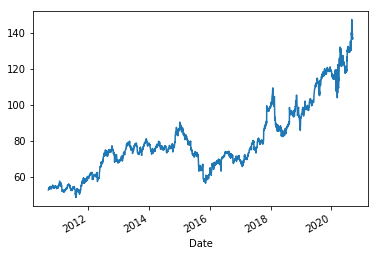

In [31]:
df['WMT'].plot()